* data:  GTEx count data with $(n,p) = (11688,55863)$

* method: 
    * apply `rsvd` to count data $X$ with D = 200
    * Use the $d = 50$ top components to approximate count with $\hat{X}$ (set negative elements to 0)
    * apply `betanmf` (NMF_FRO with lee's mu update) to $\hat{X}$

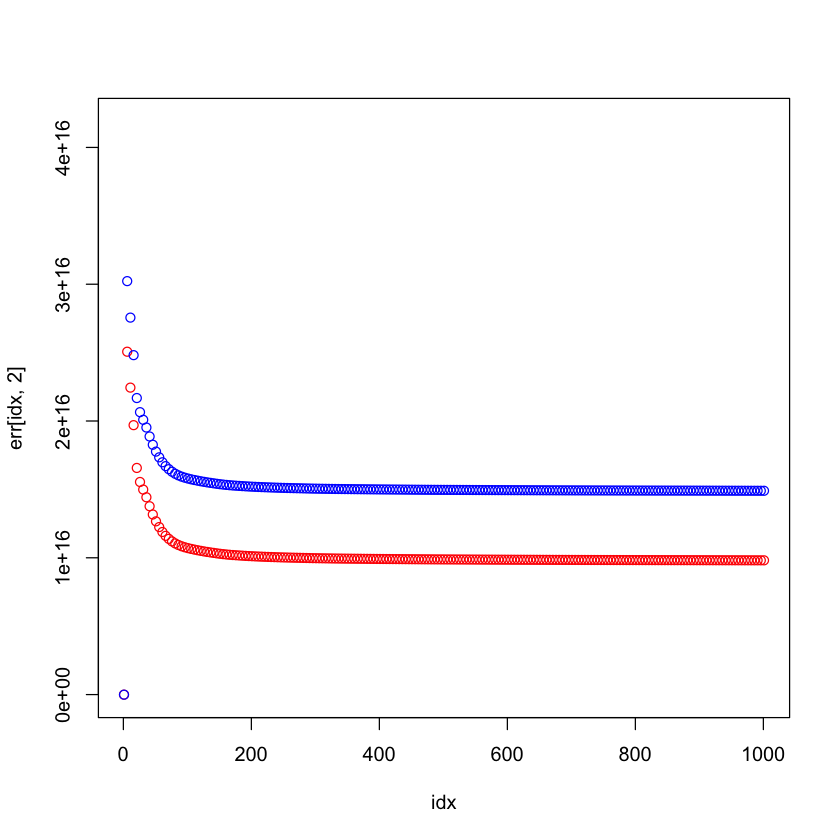

In [1]:
err = read.csv("../bigdata/gtex_error_rsvdfronmf_d50.csv", header = F)
niter = nrow(err)
idx = seq(1,niter, 5)
plot(idx, err[idx,2], col = "red", ylim = c(min(err), max(err)))
points(idx,err[idx,1], col = "blue")
#abline(h = -6.425443837866e+12, col = "green")
#legend(x = 600, y = -6.2e+12, legend = c("cost on X", "cost on Xhat", "direct betanmf"), col = c("red", "blue", "green"), lty = 1:1:1)